# Taller Final

Este taller es para llevar a cabo durante las próximas 3 semanas. En la clase estaremos mirando algunos aspectos y solucionando preguntas y problemas de cada estudiante.

Entrega Febrero 2

## Puntos

1. Generar un mapa de su sección de datos topográficos

2. Generar perfiles E-W (filas), N-S (columnas) y seleccione sus perfiles preferidos a 30 y 45  grados.

3. **Dirección de flujo** Define la dirección de flujo del agua en cada punto de su grilla. 

Siga el siguiente esquema
```
   64  128  1
   32   x   2
   16   8   4
   
```
Cómo se determina la dirección de flujo?
- Calcule la diferencia de altura entre el punto central y cada uno de los 8 puntos alrededor. 
- Divida por la distancia (1 para los puntos a der-izq y arr-aba y $\sqrt(2)$ para los puntos diagonales). Busque el punto con mayor pendiente (positiva si baja, negativo si sube).
- Para algunos puntos no se puede calcular la dirección de flujo, porque está en un valle plano, es decir no hay un punto más bajo que el punto central. Cómo podemos mejorar esos puntos? Mire la dirección de flujo de puntos alrededor para darle dirección a su punto.  
   
4. ** Mapa dirección de flujo** Una vez tenga su dirección de flujo, haga una figura del mapa de dirección de flujo. Haga la figura con `np.log2(dir)` para que los colores sean planos. 


5. **Acumulación de flujo** Determine que tanta agua pasa por cada punto. Si a un punto central el flujo le llega de un punto cercano, sume 1. Vaya acumulando la suma de celdas que llegan a cada grilla. Debe realizarlo multiples veces para obtener un resultado final. 

- Busque los valores donde el valor acumulado sea 0, en ese caso estamos hablando de las zonas altas o picos. Haga un mapa de ellos. 

- Busque los puntos con acumulaci´øn de flujo mayor a 100, o 1000 o 10000, representa la posición de las corrientes (ríos, quebradas, etc.). 

### Así hace ARCGis, TopoToolbox, etc. para determinar la ubicación de corrientes a partir de un DEM. 


In [8]:
#Primero: cargar el Drive:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Clases/clase23/

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Clases/clase23


# Cargar módulos

In [9]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm


#**MAPA 1, SECCIÓN DE DATOS TOPOGRÁFICOS**#

(1000, 1000)
(1000, 1000) (1000, 1000)
1000000


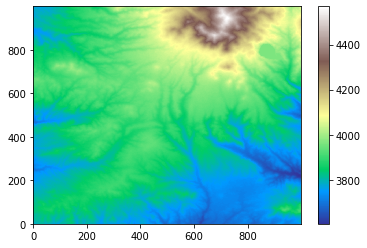

In [12]:
ngrid = 1000
egrid = 1000

fname = 'topo.npy'
dstep = 1.0
topo  = np.load(fname)
ni,nj = np.shape(topo)


i1    = np.random.randint(ni-ngrid)
j1    = np.random.randint(nj-egrid)

topo = topo[i1:i1+ngrid,j1:j1+egrid]
ni,nj = np.shape(topo)
boxi  = np.array([i1,i1,i1+ngrid,i1+ngrid,i1])
boxj  = np.array([j1,j1+egrid,j1+egrid,j1,j1])

npos = np.arange(ni)*dstep
epos = np.arange(nj)*dstep

nmat,emat = np.meshgrid(epos,npos)


print(np.shape(topo))
print(np.shape(nmat),np.shape(emat))
print(ni*nj)
fig = plt.figure()
ax = fig.add_subplot()
im = ax.pcolor(emat,nmat,topo,cmap='terrain')
# ax.set_aspect('equal', adjustable='box')
plt.colorbar(im,ax=ax)

#**MAPA 2: CORTES Y PERFILES LONGITUDINALES**

#**Cols**

[]

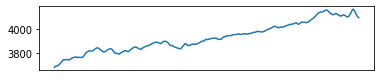

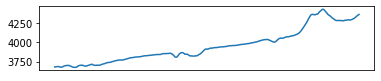

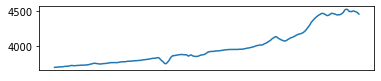

In [13]:
#1
rplot = 500
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
ax.plot(nmat[rplot,:],topo[rplot,:])
ax.set_xticks([])
#2
rplot = 650
fig = plt.figure()
ax = fig.add_subplot(3,1,2)
ax.plot(nmat[rplot,:],topo[rplot,:])
ax.set_xticks([])
#3
rplot = 700
fig = plt.figure()
ax = fig.add_subplot(3,1,3)
ax.plot(nmat[rplot,:],topo[rplot,:])
ax.set_xticks([])

#**Rows**

[]

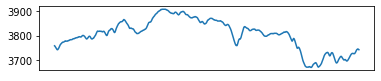

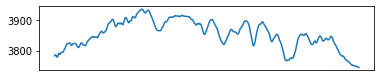

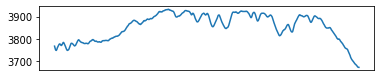

In [14]:
#1
cplot = 300

fig = plt.figure()
ax = fig.add_subplot(3,1,1)
ax.plot(emat[:,cplot],topo[:,cplot])
ax.set_xticks([])
# ax.set_ylim((500,4800))

#2
cplot = 450

fig = plt.figure()
ax = fig.add_subplot(3,1,2)
ax.plot(emat[:,cplot],topo[:,cplot])
ax.set_xticks([])
# ax.set_ylim((500,4800))

#3
cplot = 500

fig = plt.figure()
ax = fig.add_subplot(3,1,3)
ax.plot(emat[:,cplot],topo[:,cplot])
ax.set_xticks([])
# ax.set_ylim((500,4800))

#**MAPA 3: FLUJO Y PATRÓN DE DRENAJE**#

#**Dirección de flujo**#

###**Encontrar el canal de un río:**### 
###***¿Hacia dónde fluye el agua? Ligado a las curvas de nivel***###

In [15]:
def submat(topo,i,j):
    """
    Función que extrae una matriz 3x3 de otra más grande
    con punto central i,j
    """
    m1= np.zeros((3,3),dtype=int)+np.nan
    m1= topo[i-1:i+2,j-1:j+2]
    
    #Convertir a un vector (arreglo):

    v1 = np.zeros(8)
    v1[0] = m1[0,2]
    v1[1] = m1[1,2]
    v1[2] = m1[2,2]
    v1[3] = m1[2,1]
    v1[4] = m1[2,0]
    v1[5] = m1[1,0]
    v1[6] = m1[0,0]
    v1[7] = m1[0,1]

    #Punto central X
    vx= m1[1,1]
    
    #print(m1)
    return v1,vx

In [16]:
def dir_flujo(v1,vx):
    """
    A partir de un vector de 8 posiciones, asumiendo nomenclatura arriba
    define la dirección de flujo usando base 2.
    """
    n1= 1.0
    n2 = np.sqrt(2)
    dist= np.array([n2,n1,n2,n1,n2,n1,n2,n1])  
    #Se hace así para calcular 
    #de una vez las distancias diagonales del punto central a los demás, 
    #en vez de la diferencia en la vertical (unicamente).
    
    pend = (vx-v1)/dist
    pdir = np.argmax(pend) #Calcula posición de la pendiente más pronunciada.
    pmax = np.max(pend)
    dflow = 2**pdir  #Hacia donde va el flujo en la posición de la matriz.
    
    return dflow

In [17]:
def flujo_cum(f1,c1):
  import numpy as np
  fideal = np.array([16,32,64,128,1,2,4,8],dtype=int)
  ncnt = 0
  fdif = f1-fideal
  for k in range(8):
    if (fdif[k]==0):
      ncnt = ncnt + 1 + c1[k]
  return ncnt

In [18]:
#Loop para que lo haga con todas las posiciones:
ni,nj =  np.shape(topo)
fdir = np.zeros((ni,nj),dtype=int)
#Pase por todas las filas, los unos (1) son para quitar 
#las esquinas (no en la esquina)
for i in range(1,ni-1): 
    for j in range(1,nj-1): #Ahora que pase por todas las columnas
        
        v1,vx = submat(topo,i,j)  #Llamamos a la función que configura
                    # la matriz 3x3 extraida de los datos topográficos
        
        fdir[i,j] = dir_flujo(v1,vx)   #Llamamos a la función para 
                                        #la dirección del flujo

#**Mapa de posiciones**#

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':


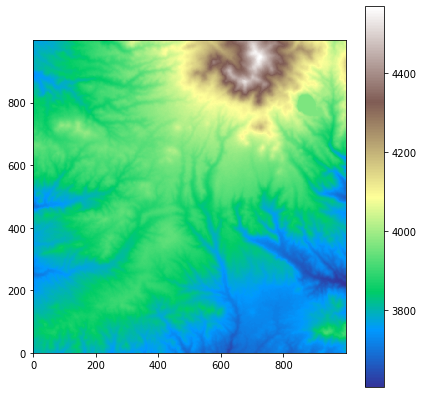

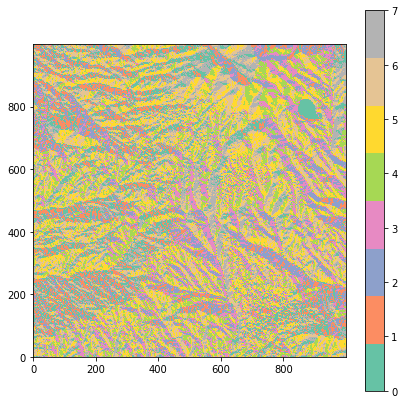

In [24]:
###
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
im = ax.pcolor(emat,nmat,topo,cmap='terrain') 
ax.set_aspect('equal', adjustable='box')
plt.colorbar(im,ax=ax)

###

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
im = ax.pcolor(emat,nmat,np.log2(fdir),cmap='Set2')
ax.set_aspect('equal', adjustable='box')
plt.colorbar(im,ax=ax)

#**Mapa de acumulaciones**#




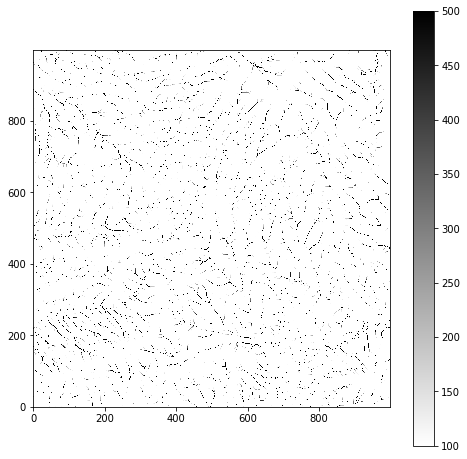

In [27]:
cflow = np.zeros((ni,nj),dtype=int)
for k in range(100):
  i = 27
  j = 200
  for i in range(1,ni-1):
    for j in range(1,nj-1):
      f1,fx = submat(fdir,i,j)
      c1,cx = submat(cflow,i,j)
      cflow[i,j]= flujo_cum(f1,c1)
      
  ## GRÁFICA
  if(k%50>0): #Para repetirlo muchísimas veces y que se marquen más los drenajes
    continue

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
im = ax.pcolor(emat,nmat,cflow,cmap='binary',vmin=100,vmax=500)
ax.set_aspect('equal', adjustable='box')
plt.colorbar(im,ax=ax)

#**MAPA FINAL**

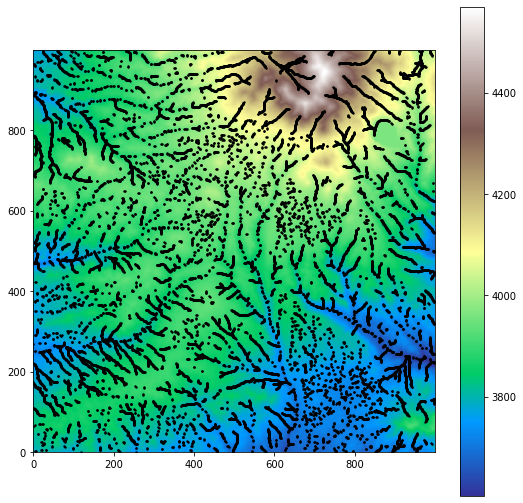

In [28]:
acmT = np.array(np.where(cflow>300))
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
im = ax.pcolor(emat,nmat,topo,cmap='terrain')
ax.set_aspect('equal', adjustable='box')
plt.colorbar(im,ax=ax)
ax.scatter(acmT[0,:],acmT[1,:],s=2,color='black')